# Heart failure case - Data exploration

In this notebook you will find the data exploration phase. The purpose of this phase is the find duplicate, missing values, particularities and outliers.
We will start with loading all the required packages to explore the "data.csv" file and make usefull graphs to make the findings visual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

## Loading data and explore the column names and data types
The next step after loading the required packages is to explore the available column names and there datatypes.

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,CaseNumber,LastName,PostCode,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,431-06-4243,Richard,99847,40.0,M,ATA,140,289,0,0,172,N,0.0,Up,0
1,415-39-7809,Sheppard,64192,49.0,F,NAP,160,180,0,0,156,N,1.0,Flat,1
2,517-18-4618,Howard,29132,37.0,M,ATA,130,283,0,1,98,N,0.0,Up,0
3,634-33-8726,Taylor,12930,48.0,F,ASY,138,214,0,0,108,Y,1.5,Flat,1
4,151-40-1619,Mcgrath,79393,54.0,M,NAP,150,195,0,0,122,N,0.0,Up,0


By iterating over the first five rows of data you can clearly one outstanding particularity. Age is represented as a floating point number.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CaseNumber      918 non-null    object 
 1   LastName        918 non-null    object 
 2   PostCode        918 non-null    int64  
 3   Age             915 non-null    float64
 4   Sex             918 non-null    object 
 5   ChestPainType   918 non-null    object 
 6   RestingBP       918 non-null    int64  
 7   Cholesterol     918 non-null    int64  
 8   FastingBS       918 non-null    int64  
 9   RestingECG      918 non-null    int64  
 10  MaxHR           918 non-null    int64  
 11  ExerciseAngina  918 non-null    object 
 12  Oldpeak         918 non-null    float64
 13  ST_Slope        918 non-null    object 
 14  HeartDisease    918 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 107.7+ KB


After printing the datatypes of every column our conclusion about the Age column is confirmed as it has a float64 datatype. <br/>
The dataset contains 918 rows of data excluding the columns rows which means that it is not a large dataset. Because it is such a small dataset dropping rows with missing or incorrect values can have huge impact on the model performance<br/>
Most of the columns are having the object datatype because this is how python treats the non primitive types. <br/>
PostCode is stored as a int64 this means that values in that column cannot start with zeros. Therefore the datatype of the column may be transformed to a string (Textual value) at loading<br/>
HeartDisease is represented as a object which is interesting, because the first five rows only contains 0 or 1 values.


In [5]:
df.HeartDisease.unique().tolist()

['0', '1', 'yes']

By printing the unique values of the HeartDisease column it became clear that it also contains textual values of yes which isn't easy to work with in the rest of the exploration phase. <br/> 
The yes values will be converted to binary values "1" and the datatype of the column will be converted to int32

In [6]:
df.HeartDisease = df.HeartDisease.replace({ 'yes': '1', 'no': '0' }).astype(int)
df.HeartDisease.unique().tolist()

[0, 1]

## Finding missing values
The next step is to find missing values by combining the isna() and sum() methods on the dataframe. When viewing the result we can make the conclusion that there are 3 rows that does not contain a value for the "Age" column.
We will drop the missing values for this exploration phase, but we may need to fill in these values when using the dataset for model training.

In [7]:
df.isna().sum()

CaseNumber        0
LastName          0
PostCode          0
Age               3
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df = df.dropna() #Drop null values

## Finding outliers
We can use the describe() method to get more information about the numeric values in a dataframe. <br/>By comparing the min and max values with the mean of the Resting column we can say that the values are not evenly distributed and therfore need to be analysed futher.

In [27]:
df.describe()

,PostCode,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,50344.066667,53.512568,131.918033,198.661202,0.233880,0.605464,136.874317,0.888087,0.553005
std,29138.710194,9.448039,21.908424,109.517656,0.423528,0.806546,25.454953,1.066878,0.497454
min,549.000000,28.000000,-126.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,24125.500000,47.000000,120.000000,173.000000,0.000000,0.000000,120.000000,0.000000,0.000000
50%,51310.000000,54.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.600000,1.000000
75%,75673.000000,60.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.500000,1.000000
max,99847.000000,77.000000,200.000000,603.000000,1.000000,2.000000,202.000000,6.200000,1.000000


You can use a boxplot like the one below to make outliers visible. In the box plot you can clearly see that the values are not evenly distributed and may need to be transformed if the values are not correct.

<Axes: >

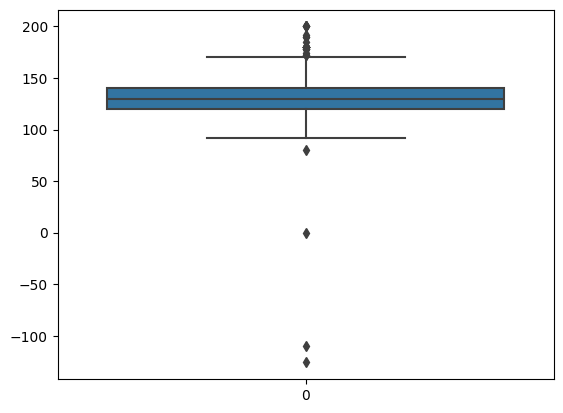

In [10]:
sns.boxplot(df.RestingBP)

## Plotting the balance of the dataset

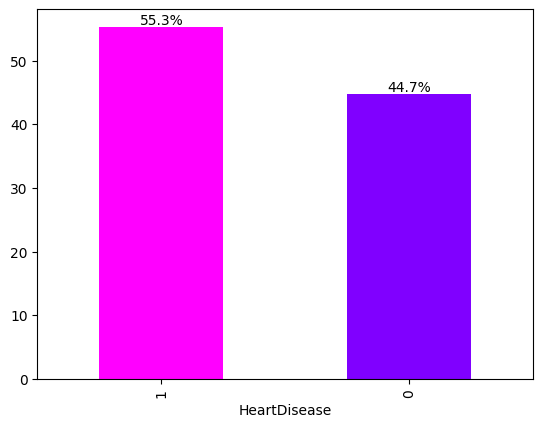

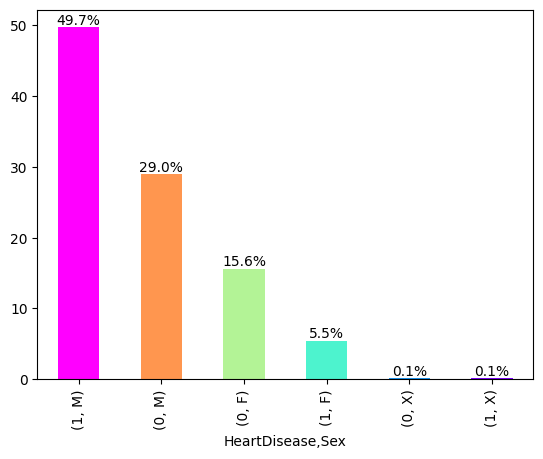

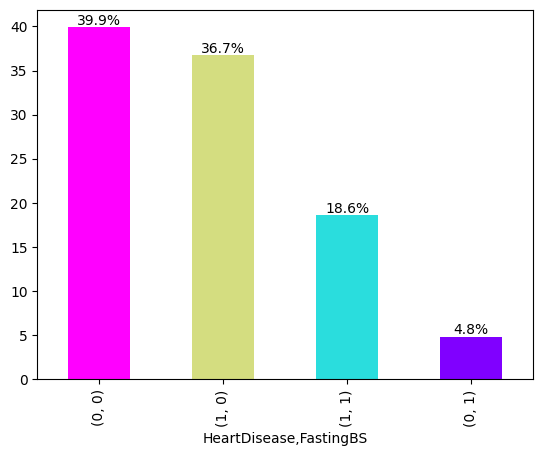

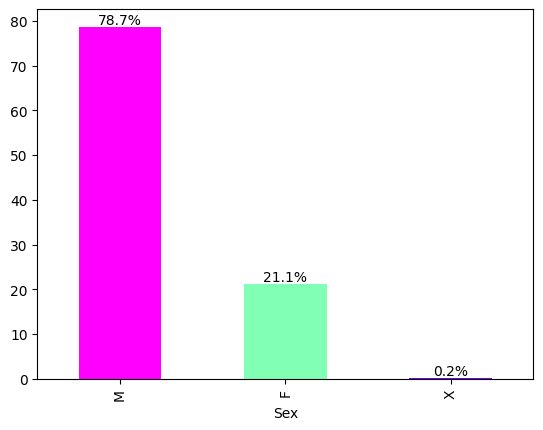

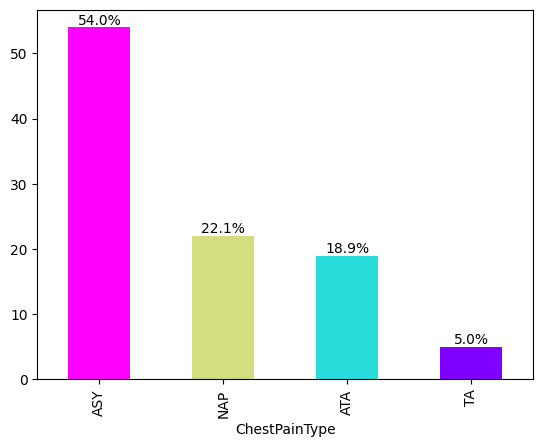

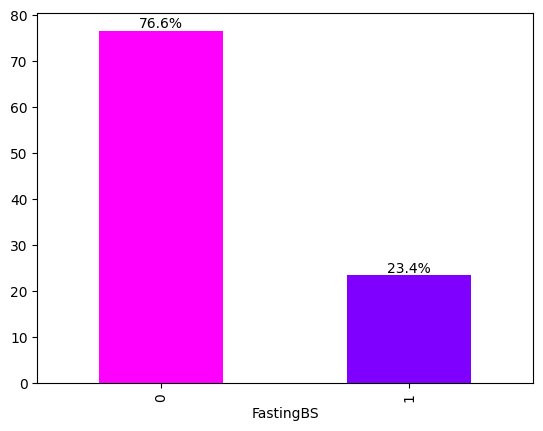

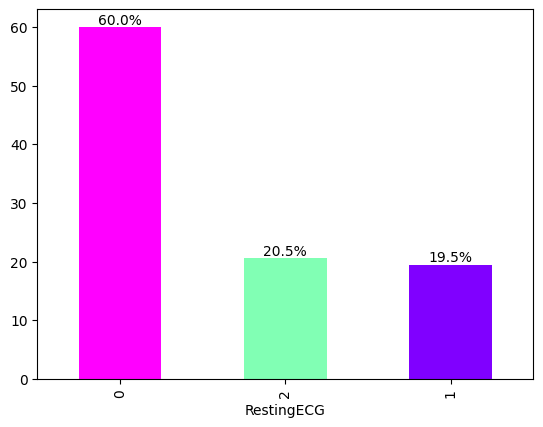

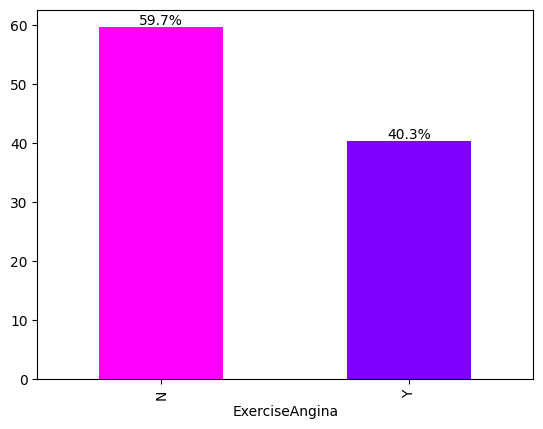

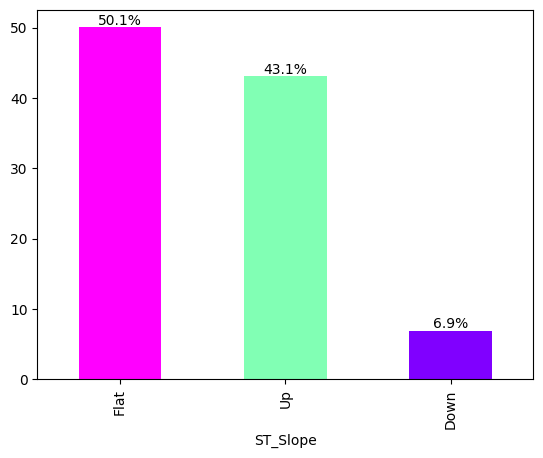

In [116]:
def plot_balance(df, column):
	balance = df[column].value_counts()
	colors = plt.cm.rainbow(np.linspace(1, 0, len(balance)))
	colors[0] = (1.0, 0.0, 1.0, 1.0)
	balance = balance.div(len(df)/100)
	ax = balance.plot(kind="bar", color=colors)

	# Specify value label formats
	for container in ax.containers:
		ax.bar_label(container, fmt=lambda v: f"{round(v, 1)}%")
	
	plt.show()

plot_balance(df, "HeartDisease")
plot_balance(df, ["HeartDisease", "Sex"])
plot_balance(df, ["HeartDisease", "FastingBS"])

for column in ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]:
	plot_balance(df, column)


# Analyse catagorical columns
Catagorical columns will be analaysed to find unkown categories. There first catagorical column Sex contains rows with the value 'X' which was not known before.

In [11]:
df.Sex.unique().tolist()

['M', 'F', 'X']

The following catagorical columns do contain values that are known and can be transfored using one-hot encoding

In [12]:
df.ChestPainType.unique().tolist()

['ATA', 'NAP', 'ASY', 'TA']

In [13]:
df.ST_Slope.unique().tolist()

['Up', 'Flat', 'Down']

Because the "ExerciseAngina" column only includes two values it can be transformed into the binary values 1 or 0

In [14]:
df.ExerciseAngina.unique().tolist()

['N', 'Y']